<a href="https://www.kaggle.com/code/ilaydakileci/deep-learning-project?scriptVersionId=203098882" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<span style="color:#1F618D; font-size:35px;">Yapay Sinir Ağı (ANN) Nedir?</span>

<span style="color:#555555; font-size:18px;"> Yapay Sinir Ağları (Artificial Neural Networks - ANN), insan beynindeki sinir hücrelerinin çalışma prensiplerine dayalı olarak geliştirilmiş öğrenme algoritmalarıdır. Sinir ağı, birbirine bağlı birimlerden oluşan katmanlardan meydana gelir. Her birim (nöron), ağırlıklı girişleri alır, bir aktivasyon fonksiyonu aracılığıyla işler ve bir çıktı üretir. Bu yapı, özellikle büyük veri setleri üzerinde karmaşık kalıpları öğrenmek ve tahminlerde bulunmak için oldukça etkilidir. </span>


<span style="color:#1F618D; font-size:30px;">Bu Model Neden Kullanıldı?</span>

<span style="color:#555555; font-size:18px;"> Bu çalışmada, bir balık veri seti üzerinde sınıflandırma yapmak için ANN modeli kullandık. Model, farklı balık türlerini öğrenip sınıflandırmak için eğitilmiştir. Görüntü işleme ve sınıflandırma işlemleri için ANN'ler oldukça güçlüdür çünkü görüntüdeki karmaşık ilişkileri ve kalıpları yakalayabilirler. </span>

<span style="color:#1F618D; font-size:30px;">Model Nasıl İyileştirildi?</span>

<span style="color:#555555; font-size:18px;"> Modelimizin performansını artırmak için şu stratejileri kullandık: </span>

<span style="color:#2980B9; font-size:18px;">Veri Artırma (Data Augmentation):</span> Eğitim verilerini çoğaltarak modelin farklı varyasyonları öğrenmesini sağladık ve aşırı öğrenmeyi (overfitting) azalttık.

<span style="color:#2980B9; font-size:18px;">Dropout Katmanları:</span> Aşırı öğrenmeyi önlemek amacıyla ağın bazı bağlantılarını rastgele kapatarak modelin genelleştirme yeteneğini artırdık.

<span style="color:#2980B9; font-size:18px;">Erken Durdurma (Early Stopping):</span> Eğitim sürecinde modelin doğrulama seti üzerinde kötüleşmeye başladığı noktada eğitimi durdurduk ve en iyi performansı sağlayan ağırlıkları geri yükledik.

<span style="color:#2980B9; font-size:18px;">Öğrenme Hızı Azaltma (Learning Rate Scheduling):</span> Modelin eğitim esnasında belirli bir noktada iyileşmesi durduğunda, öğrenme hızını dinamik olarak azaltarak, daha hassas bir öğrenme süreci sağladık.

<span style="color:#2E86C1; font-size:30px;">1. Gerekli Kütüphanelerin Yüklenmesi</span>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

<span style="color:#555555; font-size:16px;"> Bu adımda veri işleme, model oluşturma ve değerlendirme aşamalarında kullanacağımız kütüphaneleri yükledik. TensorFlow, model eğitimi için kullanılırken, seaborn ve matplotlib ile görselleştirme yapılacak. </span>

<span style="color:#2E86C1; font-size:30px;">2. Veri Setinin Hazırlanması</span>

<span style="color:#555555; font-size:16px;"> Bu adımda, veri setindeki görüntülerin yolları ve sınıf etiketlerini toplayıp bir DataFrame oluşturduk. Veri setimizde GT (Ground Truth) olmayan görüntülerle çalışıyoruz. </span>
<span style="color:#555555; font-size:16px;"> Veri setimizi %80 eğitim ve %20 test olacak şekilde ikiye böldük. Böylece modelin doğruluğunu bağımsız bir test seti üzerinde ölçebileceğiz. </span>
<span style="color:#555555; font-size:16px;"> Görüntüleri ağ üzerinde eğitebilmek için her birini yeniden boyutlandırdık ve normalize ettik (her bir pikseli [0,1] aralığına getirdik). Eğitim ve doğrulama için veri artırma işlemleri (data augmentation) uygulandı. Test seti üzerinde herhangi bir veri artırma işlemi yapılmadı. </span>


In [2]:



DIR = '/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset'
classes = [i for i in os.listdir(DIR) if '.' not in i]


label = []
path = []

for dirname, _, filenames in os.walk(DIR):
    for filename in filenames:
        if os.path.splitext(filename)[-1] == '.png':
            if 'GT' not in dirname:
                label.append(os.path.split(dirname)[-1])
                path.append(os.path.join(dirname, filename))


df = pd.DataFrame({'path': path, 'label': label})


train_df, test_df = train_test_split(df, train_size=0.8, shuffle=True, random_state=42)


train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_images = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='path',
    y_col='label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='path',
    y_col='label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)


test_datagen = ImageDataGenerator(rescale=1./255)
test_images = test_datagen.flow_from_dataframe(
    dataframe = test_df,
    x_col='path',
    y_col='label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 5760 validated image filenames belonging to 9 classes.
Found 1440 validated image filenames belonging to 9 classes.
Found 1800 validated image filenames belonging to 9 classes.


<span style="color:#2E86C1; font-size:30px;">5. Modelin Oluşturulması</span>

<span style="color:#555555; font-size:16px;"> Modelimiz basit bir Sequential modeldir. Görüntüleri tamamen bağlantılı (dense) katmanlara dönüştürdük. Aktivasyon fonksiyonu olarak ReLU, son katman için softmax kullandık. Dropout katmanları ile aşırı öğrenmeyi (overfitting) önlemeyi amaçladık. </span>

In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(516, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),  # Dropout ekleyin
    tf.keras.layers.Dense(224, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),  # Dropout ekleyin
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')  # Çıkış katmanı (9 sınıf)
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)  # .h5 yerine .keras
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)





/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 516)            │    77,672,964 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 516)            │         2,064 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 516)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 224)            │       115,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 224)            │           896 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 224)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        28,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,821,693 (296.87 MB)

 Trainable params: 77,820,213 (296.86 MB)

 Non-trainable params: 1,480 (5.78 KB)

<span style="color:#2E86C1; font-size:30px;">6. Modeli Eğitme ve Geri Dönüşler</span>

<span style="color:#555555; font-size:16px;"> Modelin eğitim aşamasında, Early Stopping ile modelin performansı iyileşmediğinde erken durdurma ekledik. En iyi modeli kaydetmek için ModelCheckpoint kullandık. Ayrıca, öğrenme hızını dinamik olarak azaltan bir öğrenme oranı planlayıcısı (LR Scheduler) da ekledik. </span>

In [4]:

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=20,
    callbacks=[early_stopping, model_checkpoint, lr_scheduler]
)


model.evaluate(val_images)

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1729775687.543423      70 service.cc:145] XLA service 0x7984000020c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729775687.543477      70 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1729775687.543483      70 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  1/180 ━━━━━━━━━━━━━━━━━━━━ 33:57 11s/step - accuracy: 0.1875 - loss: 2.8899

I0000 00:00:1729775692.349374      70 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


180/180 ━━━━━━━━━━━━━━━━━━━━ 128s 651ms/step - accuracy: 0.2636 - loss: 2.2142 - val_accuracy: 0.4049 - val_loss: 1.8198 - learning_rate: 0.0010
Epoch 2/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 77s 416ms/step - accuracy: 0.4786 - loss: 1.4694 - val_accuracy: 0.6368 - val_loss: 1.0073 - learning_rate: 0.0010
Epoch 3/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 77s 414ms/step - accuracy: 0.5942 - loss: 1.1447 - val_accuracy: 0.6569 - val_loss: 0.9405 - learning_rate: 0.0010
Epoch 4/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 77s 418ms/step - accuracy: 0.6499 - loss: 0.9826 - val_accuracy: 0.7729 - val_loss: 0.6621 - learning_rate: 0.0010
Epoch 5/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 78s 397ms/step - accuracy: 0.7157 - loss: 0.8082 - val_accuracy: 0.6882 - val_loss: 0.9184 - learning_rate: 0.0010
Epoch 6/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 78s 421ms/step - accuracy: 0.7521 - loss: 0.7003 - val_accuracy: 0.7778 - val_loss: 0.6197 - learning_rate: 0.0010
Epoch 7/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 77s 417ms/step - accuracy: 0.7822 - loss

[0.17624181509017944, 0.949999988079071]

<span style="color:#2E86C1; font-size:30px;">7. Eğitim Sonuçlarının Değerlendirilmesi</span>

<span style="color:#555555; font-size:16px;"> Modelin eğitim sürecinde elde edilen kayıp (loss) ve doğruluk (accuracy) değerleri görselleştirildi. Grafiklerde modelin nasıl öğrendiğini ve doğrulama setindeki performansını gözlemleyebiliriz. </span>

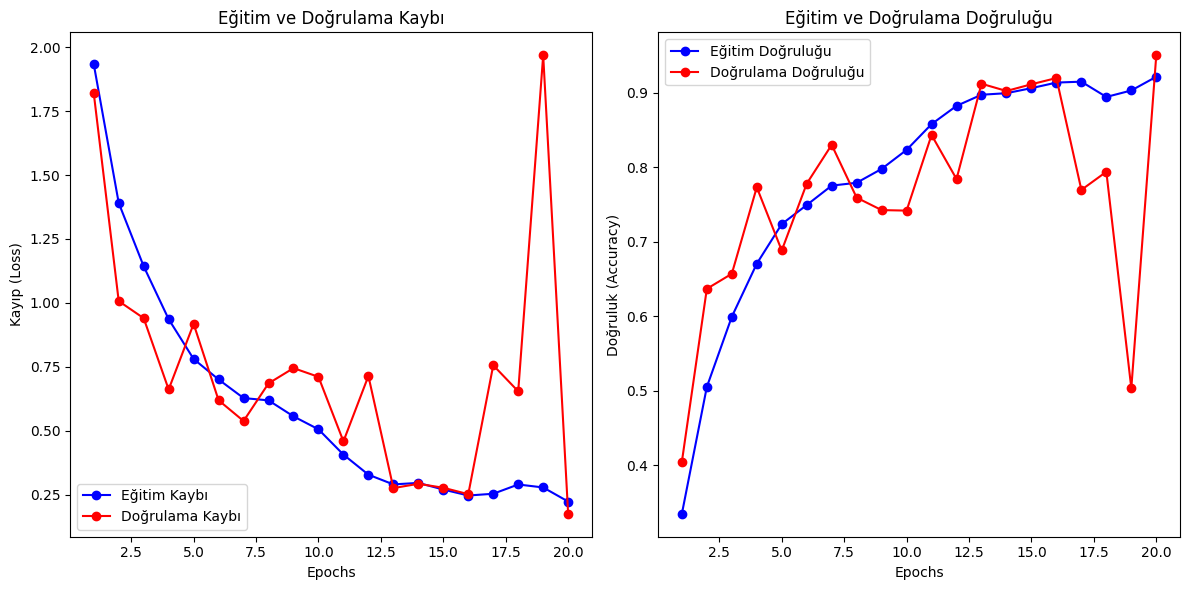

In [5]:
import matplotlib.pyplot as plt


history_dict = history.history


train_loss = history_dict['loss']
val_loss = history_dict['val_loss']


train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']


epochs = range(1, len(train_loss) + 1)


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Eğitim Kaybı')
plt.plot(epochs, val_loss, 'ro-', label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epochs')
plt.ylabel('Kayıp (Loss)')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'bo-', label='Eğitim Doğruluğu')
plt.plot(epochs, val_acc, 'ro-', label='Doğrulama Doğruluğu')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epochs')
plt.ylabel('Doğruluk (Accuracy)')
plt.legend()


plt.tight_layout()
plt.show()


<span style="color:#2E86C1; font-size:30px;">8. Test Seti Performansı</span>

<span style="color:#555555; font-size:16px;"> Son olarak, modelin bağımsız test seti üzerinde nasıl performans gösterdiğini ölçtük. Test kaybı ve doğruluğu (accuracy) değerleri bu aşamada gösterilecektir. </span>

In [6]:
results = model.evaluate(test_images, verbose=0)
print("Test Loss : {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Loss : 0.17837
Test Accuracy: 94.44%


In [7]:
pred = model.predict(test_images)
pred = np.argmax(pred, axis=1)

57/57 ━━━━━━━━━━━━━━━━━━━━ 18s 317ms/step


<span style="color:#1F618D; font-size:30px;"> 9.Model Tahminlerinin Etiketlenmesi ve Test Sonuçlarının Görselleştirilmesi</span> 

<span style="color:#555555; font-size:16px;"> Bu aşamada, modelin test veri seti üzerindeki performansını değerlendiriyoruz. İlk olarak, modelin tahminlerini elde edip, tahmin edilen sınıfları gerçek etiketlerle karşılaştırıyoruz. Ardından, tahminlerin doğru ya da yanlış olup olmadığını gözlemleyip, örnekler üzerinde görselleştirme yapıyoruz. </span>

In [8]:
pred_df= test_df.copy()
labels={}
for l,v in test_images.class_indices.items():
    labels.update({v:l})
pred_df['pred']=pred
pred_df['pred']=pred_df['pred'].apply(lambda x: labels[x])


In [9]:
pred_df=test_df.copy()
labels={}
for l,v in test_images.class_indices.items():
    labels.update({v:l})
pred_df['pred']=pred
pred_df['pred']=pred_df['pred'].apply(lambda x: labels[x])

pred_df=pred_df.reset_index(drop=True)
pred_df.head(10)
pred_df=pred_df.reset_index(drop=True)
pred_df.head(10)

,path,label,pred
0,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Gilt-Head Bream,Gilt-Head Bream
1,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Black Sea Sprat,Black Sea Sprat
2,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel,Hourse Mackerel
3,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Trout,Trout
4,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream,Trout
5,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream,Red Sea Bream
6,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Striped Red Mullet,Striped Red Mullet
7,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream,Red Sea Bream
8,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Mullet,Red Mullet
9,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Trout,Trout


<span style="color:#1F618D; font-size:30px;">10.Yanlış Tahmin Edilen Örneklerin İncelenmesi</span> 

<span style="color:#555555; font-size:16px;"> Bu bölümde, modelin yanlış tahmin ettiği örnekler üzerinde duruyoruz. Yanlış tahmin edilen örnekler, modelin hangi sınıflarda zorlandığını anlamamıza yardımcı olabilir. </span>

In [10]:
pred_df[pred_df['label']!=pred_df['pred']]

,path,label,pred
4,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream,Trout
10,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Mullet,Red Sea Bream
11,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Striped Red Mullet,Black Sea Sprat
24,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Striped Red Mullet,Black Sea Sprat
52,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Striped Red Mullet,Black Sea Sprat
...,...,...,...
1668,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel,Trout
1670,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Mullet,Gilt-Head Bream
1688,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Black Sea Sprat,Sea Bass
1734,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Striped Red Mullet,Sea Bass


In [11]:
pred_df.path[1696]

'/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Gilt-Head Bream/Gilt-Head Bream/00452.png'

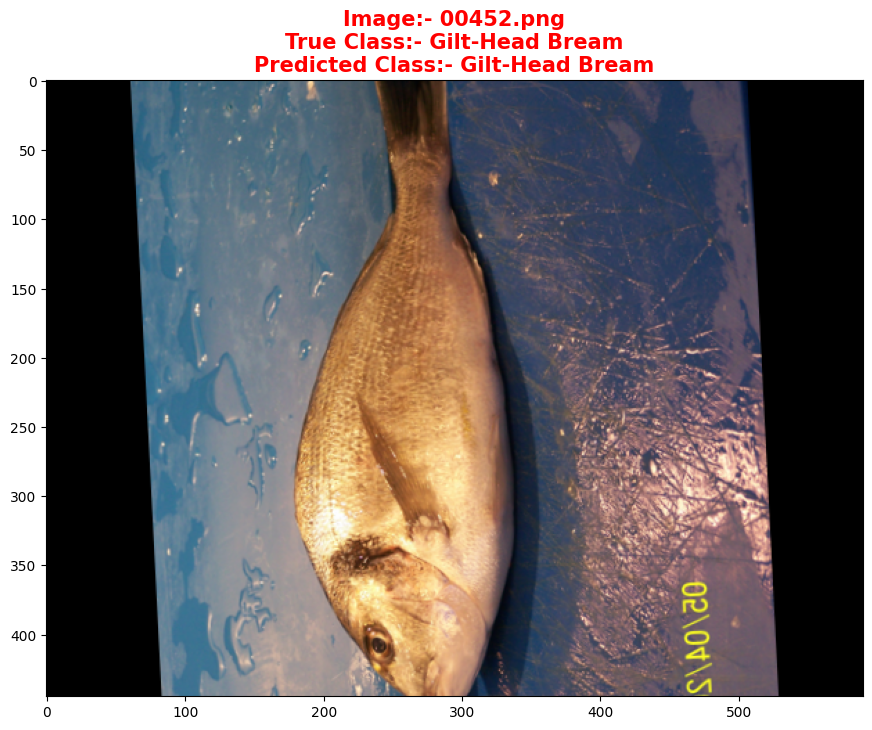

In [12]:
plt.figure(figsize=(15,8))
plt.imshow(plt.imread(pred_df.path[1696]))
title1 = pred_df.path[1696].split('/')[-2]
title2 = pred_df.path[1696].split('/')[-1]
title3 = pred_df.pred[1696]
plt.title(f'Image:- {title2}\nTrue Class:- {title1}\nPredicted Class:- {title3}', color = 'r', weight = 'bold', fontsize = 15)
plt.show()

<span style="color:#1F618D; font-size:30px;">11.Model Performansı: Doğruluk Skoru ve Karışıklık Matrisi</span> 

<span style="color:#555555; font-size:16px;"> Modelin genel performansını değerlendirmek için doğruluk skoru hesaplanmış ve karışıklık matrisi kullanılmıştır. Bu matris, modelin hangi sınıflar arasında daha fazla hata yaptığını anlamamıza yardımcı olur. </span>

Accuracy Score: 0.9444444444444444


<Axes: >

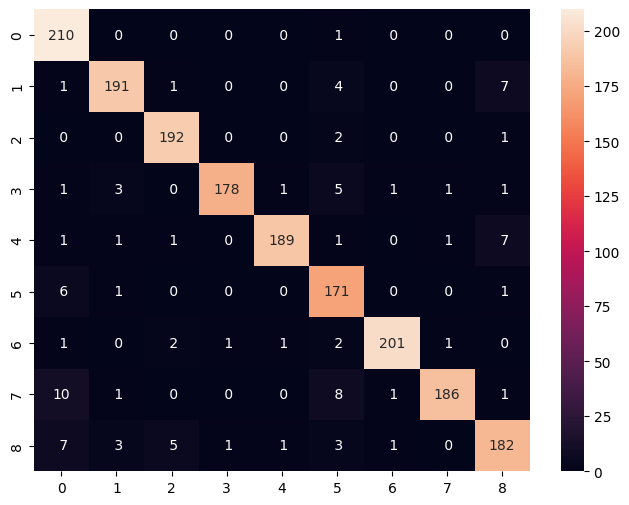

In [13]:
print(f"Accuracy Score: {accuracy_score(pred_df['label'],pred_df['pred'])}")
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(pred_df['label'],pred_df['pred']), annot=True, fmt='2d')

<span style="color:#1F618D; font-size:30px;">12.Model Performans Raporu</span> 

<span style="color:#555555; font-size:16px;"> Bu bölümde, her bir sınıf için modelin precision, recall ve f1-score değerleri hesaplanmıştır. Bu metrikler, modelin hangi sınıflarda daha iyi performans gösterdiğini anlamamıza yardımcı olur. </span>

In [14]:
print(classification_report(pred_df['label'],pred_df['pred']))

                    precision    recall  f1-score   support

   Black Sea Sprat       0.89      1.00      0.94       211
   Gilt-Head Bream       0.95      0.94      0.95       204
   Hourse Mackerel       0.96      0.98      0.97       195
        Red Mullet       0.99      0.93      0.96       191
     Red Sea Bream       0.98      0.94      0.96       201
          Sea Bass       0.87      0.96      0.91       179
            Shrimp       0.99      0.96      0.97       209
Striped Red Mullet       0.98      0.90      0.94       207
             Trout       0.91      0.90      0.90       203

          accuracy                           0.94      1800
         macro avg       0.95      0.94      0.94      1800
      weighted avg       0.95      0.94      0.94      1800

